<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="ffffff">
Resnet code

</font>
</h1>

pariya branch

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [50]:



#train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# load training data
train_ds =  train_datagen.flow_from_directory(
    r'E:\projectDataset\0minidataset\archive\sl_train',
    class_mode='categorical',
    target_size=(224,224),####
    shuffle=True,
    batch_size=32
)

# load testing data
test_ds = test_datagen.flow_from_directory(
    r'E:\projectDataset\0minidataset\archive\sl_test',
    class_mode='categorical',
    target_size=(224,224),
    shuffle=False,
    batch_size=32
)

# load validation data
val_ds =  train_datagen.flow_from_directory(
    r'E:\projectDataset\0minidataset\archive\sl_valid',
    class_mode='categorical',
    target_size=(224,224),
    shuffle=True,
    batch_size=32
)


# load validation data
one_Cat = test_datagen.flow_from_directory(
    r'E:\projectDataset\0minidataset\oneCat',
    class_mode='categorical',
    target_size=(224,224),
    shuffle=True,
    batch_size=32
)

Found 2275 images belonging to 9 classes.
Found 668 images belonging to 9 classes.
Found 962 images belonging to 9 classes.
Found 9 images belonging to 1 classes.


In [51]:
print(train_ds.class_indices)
print(test_ds.class_indices)
print(val_ds.class_indices)
print(one_Cat.class_indices)


{'Beans_Angular_LeafSpot': 0, 'Beans_Rust': 1, 'Strawberry_Angular_LeafSpot': 2, 'Strawberry_Anthracnose_Fruit_Rot': 3, 'Strawberry_Gray_Mold': 4, 'Strawberry_Powdery_Mildew_Fruit': 5, 'Tomato_Blight': 6, 'Tomato_Leaf_Mold': 7, 'Tomato_Spider_Mites': 8}
{'Beans_Angular_LeafSpot': 0, 'Beans_Rust': 1, 'Strawberry_Angular_LeafSpot': 2, 'Strawberry_Anthracnose_Fruit_Rot': 3, 'Strawberry_Gray_Mold': 4, 'Strawberry_Powdery_Mildew_Fruit': 5, 'Tomato_Blight': 6, 'Tomato_Leaf_Mold': 7, 'Tomato_Spider_Mites': 8}
{'Beans_Angular_LeafSpot': 0, 'Beans_Rust': 1, 'Strawberry_Angular_LeafSpot': 2, 'Strawberry_Anthracnose_Fruit_Rot': 3, 'Strawberry_Gray_Mold': 4, 'Strawberry_Powdery_Mildew_Fruit': 5, 'Tomato_Blight': 6, 'Tomato_Leaf_Mold': 7, 'Tomato_Spider_Mites': 8}
{'Strawberry_Powdery_Mildew_Fruit': 0}


In [52]:

# load ResNet50 pre-trained model
base_model = ResNet50(weights="imagenet",
    input_shape=(224, 224, 3),
    include_top=False)

# set base model to trainable
base_model.trainable = True

base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [53]:
# build classification model on top of ResNet50
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dropout(rate=0.5))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(rate=0.5))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(rate=0.5))
model.add(Dense(9, activation='softmax'))

# print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 9)                 585       
Total params: 49,319,817
Trainable params: 49,266,697
Non-trainable params: 53,120
_____________________________________

In [54]:
# Make the conv_base NOT trainable:

for layer in base_model.layers[:]:
   layer.trainable = False

print('base_model is now NOT trainable')

base_model is now NOT trainable


In [55]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name, layer.trainable)

0 input_3 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [56]:

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [57]:
# Short training ONLY my top layers 
#... so the conv_base weights will not be destroyed by the random intialization of the new weights



history = model.fit_generator(train_ds,
                              #epochs=3,
                             # steps_per_epoch = 10682 // batch_size,
                                 epochs=30,
                                  #epochs=27,
                                validation_data=val_ds,
                            #  initial_epoch=22,
    
                              #validation_steps = 3562 // batch_size
                              )

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
72/72 [==============================] - 356s 5s/step - loss: 3.7557 - accuracy: 0.1701 - val_loss: 2.5134 - val_accuracy: 0.1996
Epoch 2/30
72/72 [==============================] - 350s 5s/step - loss: 2.0025 - accuracy: 0.2919 - val_loss: 2.3862 - val_accuracy: 0.1944
Epoch 3/30
72/72 [==============================] - 354s 5s/step - loss: 1.7674 - accuracy: 0.3465 - val_loss: 1.7499 - val_accuracy: 0.3430
Epoch 4/30
72/72 [==============================] - 352s 5s/step - loss: 1.7411 - accuracy: 0.3626 - val_loss: 1.6237 - val_accuracy: 0.3659
Epoch 5/30
72/72 [==============================] - 353s 5s/step - loss: 1.5788 - accuracy: 0.4258 - val_loss: 1.6440 - val_accuracy: 0.3815
Epoch 6/30
72/72 [==============================] - 352s 5s/step - loss: 1.4787 - accuracy: 0.4115 - val_loss: 1.7529 - val_accuracy: 0.3170
Epoch 7/30
72/72 [==============================] - 338s 5s/step - loss: 1.4509 - accuracy: 0.4187 - val_loss: 1.9051 - val_accuracy: 0.2225
Epoch 8/30
72

In [73]:
# Make last block of the conv_base trainable:

for layer in base_model.layers[:165]:
   layer.trainable = False
for layer in base_model.layers[165:]:
   layer.trainable = True

print('Last block of the conv_base is now trainable')

Last block of the conv_base is now trainable


In [74]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name, layer.trainable)

0 input_3 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [75]:
# Compile frozen conv_base + UNfrozen top block + my top layer ... SLOW LR
from keras import models, regularizers, layers, optimizers, losses, metrics

model.compile(optimizer='adam',#optimizers.Adam(lr=1e-5)
              
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("model compiled")
print(model.summary())

model compiled
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 9)                 585       
Total params: 49,319,817
Trainable params: 30,197,769
Non-trainable params: 19,122,048
__________________

In [77]:
# Long training with fine tuning

early_stopping = EarlyStopping(patience=20)
model_checkpoint = ModelCheckpoint(
    "../Checkpoints/my_checkpoint_change_code_trainig_epoch80", save_best_only=True)

history = model.fit_generator(train_ds,
                                epochs=50,
                                #epochs=27,
                                validation_data=val_ds,
                            #  initial_epoch=22,
                                callbacks=[early_stopping,model_checkpoint]
)

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
72/72 [==============================] - 548s 8s/step - loss: 0.1781 - accuracy: 0.6092 - val_loss: 0.5366 - val_accuracy: 0.2796
INFO:tensorflow:Assets written to: ../Checkpoints\my_checkpoint_change_code_trainig_epoch80\assets
Epoch 2/50
72/72 [==============================] - 666s 9s/step - loss: 0.1881 - accuracy: 0.5767 - val_loss: 0.7303 - val_accuracy: 0.1362
Epoch 3/50
72/72 [==============================] - 663s 9s/step - loss: 0.1774 - accuracy: 0.6251 - val_loss: 1.2918 - val_accuracy: 0.0634
Epoch 4/50
72/72 [==============================] - 687s 10s/step - loss: 0.1726 - accuracy: 0.6259 - val_loss: 0.5365 - val_accuracy: 0.2484
INFO:tensorflow:Assets written to: ../Checkpoints\my_checkpoint_change_code_trainig_epoch80\assets
Epoch 5/50
72/72 [==============================] - 554s 8s/step - loss: 0.1794 - accuracy: 0.6119 - val_loss: 1.4206 - val_accuracy: 0.1528
Epoch 6/50
72/72 [==============================] - 548s 8s/step - loss: 0.1832 - accuracy: 0.58

In [62]:
"""

acc = history.history['accuracy']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

"""


"\n\nacc = history.history['accuracy']\nval_acc = history.history['val_acc']\nloss = history.history['loss']\nval_loss = history.history['val_loss']\nepochs = range(1, len(acc) + 1)\nplt.plot(epochs, acc, 'bo', label='Training acc')\nplt.plot(epochs, val_acc, 'r', label='Validation acc')\nplt.title('Training and validation accuracy')\nplt.legend()\nplt.figure()\nplt.plot(epochs, loss, 'bo', label='Training loss')\nplt.plot(epochs, val_loss, 'r', label='Validation loss')\nplt.title('Training and validation loss')\nplt.legend()\nplt.show()\n\n"

In [63]:
"""

test_loss, test_acc = model.evaluate_generator(test_generator, steps= 3561 // batch_size, verbose=1)
print('test acc:', test_acc)
"""


"\n\ntest_loss, test_acc = model.evaluate_generator(test_generator, steps= 3561 // batch_size, verbose=1)\nprint('test acc:', test_acc)\n"

In [64]:
"""
fine_tune_at = 140

# freeze layers before fine-tune layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

base_model.summary()
"""

'\nfine_tune_at = 140\n\n# freeze layers before fine-tune layer\nfor layer in base_model.layers[:fine_tune_at]:\n    layer.trainable = False\n\nbase_model.summary()\n'

In [83]:
test_loss, test_accuracy = model.evaluate(test_ds)#, steps=len(test_ds)/2
print('Accuracy on test dataset:', test_accuracy)

21/21 [==============================] - 111s 5s/step - loss: 0.8510 - accuracy: 0.1347
Accuracy on test dataset: 0.1347305327653885


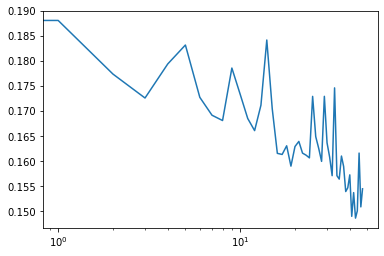

In [79]:
plt.semilogx( history.history["loss"])

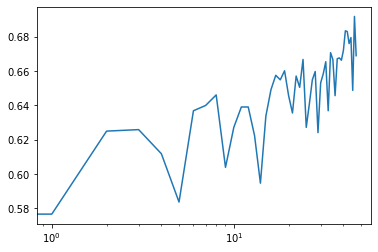

In [80]:
plt.semilogx( history.history["accuracy"])

In [81]:
model.save('../models/fruit_disease_classifier_resnet_change_code_trainig_80.h5')

In [84]:

######
predicted_batch = model.predict(train_ds)
import numpy as np
predicted_ids = np.argmax(predicted_batch, axis=-1)
class_names = list(train_ds.class_indices.keys())
predicted_class_names = [class_names[id] for id in predicted_ids]



In [97]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(train_ds, verbose=2)

print('Test accuracy:', test_acc)


72/72 - 333s - loss: 0.9652 - accuracy: 0.0910
Test accuracy: 0.09098900854587555


[3 3 3 3 3 3 3 5 3]
['Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Powdery_Mildew_Fruit', 'Strawberry_Anthracnose_Fruit_Rot']


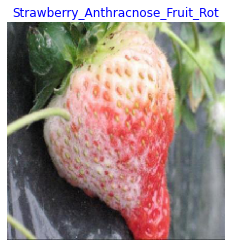

real label : Strawberry_Anthracnose_Fruit_Rot 0
predicted : Strawberry_Anthracnose_Fruit_Rot 3


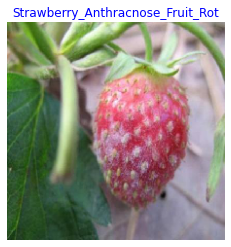

real label : Strawberry_Anthracnose_Fruit_Rot 0
predicted : Strawberry_Anthracnose_Fruit_Rot 3


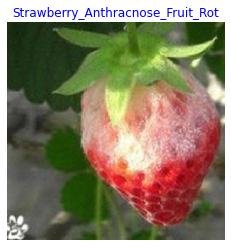

real label : Strawberry_Anthracnose_Fruit_Rot 0
predicted : Strawberry_Anthracnose_Fruit_Rot 3


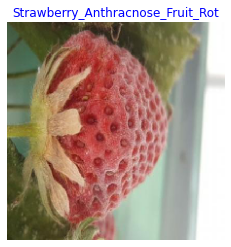

real label : Strawberry_Anthracnose_Fruit_Rot 0
predicted : Strawberry_Anthracnose_Fruit_Rot 3


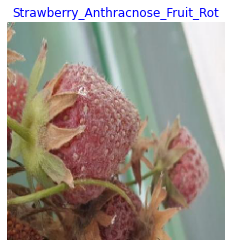

real label : Strawberry_Anthracnose_Fruit_Rot 0
predicted : Strawberry_Anthracnose_Fruit_Rot 3


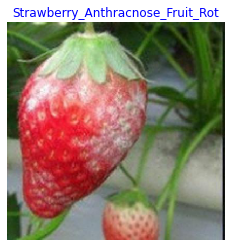

real label : Strawberry_Anthracnose_Fruit_Rot 0
predicted : Strawberry_Anthracnose_Fruit_Rot 3


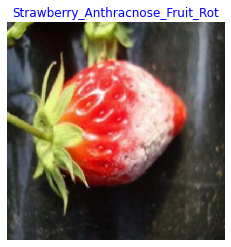

real label : Strawberry_Anthracnose_Fruit_Rot 0
predicted : Strawberry_Anthracnose_Fruit_Rot 3


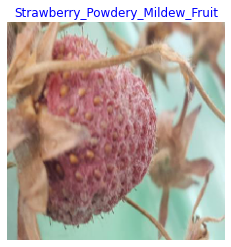

real label : Strawberry_Anthracnose_Fruit_Rot 0
predicted : Strawberry_Anthracnose_Fruit_Rot 5


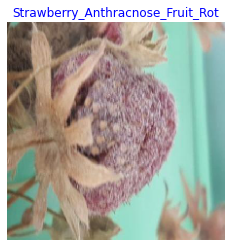

real label : Strawberry_Anthracnose_Fruit_Rot 0
predicted : Strawberry_Anthracnose_Fruit_Rot 3


In [93]:

image_batch, label_batch = one_Cat.next()
predicted_batch = model.predict(one_Cat)
predicted_ids = np.argmax(predicted_batch, axis=-1)
print(predicted_ids)
class_names = list(train_ds.class_indices.keys())
predicted_class_names = [class_names[id] for id in predicted_ids]
print(predicted_class_names)
import matplotlib.pyplot as plt
image_batch, label_batch =one_Cat.next()

for n in range(9):
    plt.axis('off')
    plt.imshow(image_batch[n])
    #color = "blue" if predicted_ids[n] == tf.math.argmax(label_batch[n]) else "red"
    color = "blue" if predicted_class_names[np.argmax(label_batch[n])] ==predicted_class_names[np.argmax(predicted_batch[n])] else "red"
  #  plt.title(predicted_class_names[n], color=color)
    plt.title(predicted_class_names[n], color=color)
    plt.show()
    print('real label :',predicted_class_names[np.argmax(label_batch[n])],np.argmax(label_batch[n]))
    #    print('real label :',label_batch[n])

   # my_formatted_list = [ '%.3f' % elem for elem in predicted_batch[n] ]
   # print('predicted:', my_formatted_list)
    print('predicted :',predicted_class_names[np.argmax(predicted_batch[n])],np.argmax(predicted_batch[n]))

#print(predicted_batch[n])


[6 3 3 ... 3 3 3]
['Tomato_Blight', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Powdery_Mildew_Fruit', 'Strawberry_Powdery_Mildew_Fruit', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Anthracnose_Fruit_Rot', 'Beans_Angular_LeafSpot', 'Tomato_Blight', 'Tomato_Blight', 'Strawberry_Powdery_Mildew_Fruit', 'Tomato_Leaf_Mold', 'Strawberry_Anthracnose_Fruit_Rot', 'Tomato_Blight', 'Strawberry_Powdery_Mildew_Fruit', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Powdery_Mildew_Fruit', 'Strawberry_Anthracnose_Fruit_Rot', 'Beans_Angular_LeafSpot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Powdery_Mildew_Fruit', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Powdery_Mildew_Fruit', 'Strawberry_Powdery_Mildew_Fruit', 'Strawberry_Anthracno

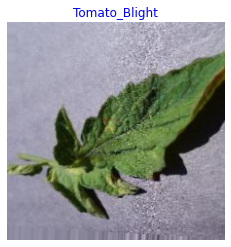

real label : Strawberry_Anthracnose_Fruit_Rot 7
predicted : Strawberry_Anthracnose_Fruit_Rot 6


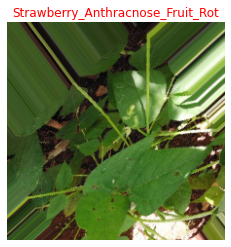

real label : Tomato_Blight 0
predicted : Strawberry_Anthracnose_Fruit_Rot 3


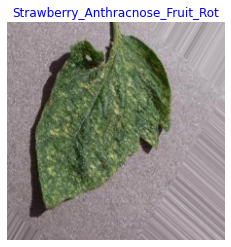

real label : Strawberry_Anthracnose_Fruit_Rot 8
predicted : Strawberry_Anthracnose_Fruit_Rot 3


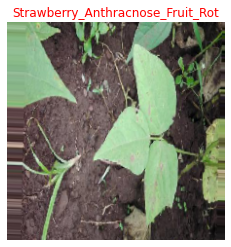

real label : Tomato_Blight 0
predicted : Strawberry_Anthracnose_Fruit_Rot 3


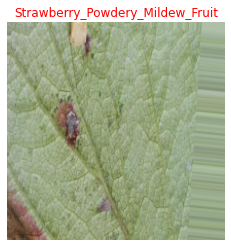

real label : Strawberry_Anthracnose_Fruit_Rot 2
predicted : Strawberry_Powdery_Mildew_Fruit 5


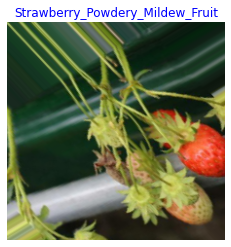

real label : Strawberry_Powdery_Mildew_Fruit 4
predicted : Strawberry_Powdery_Mildew_Fruit 5


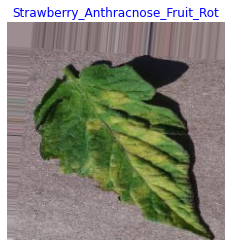

real label : Strawberry_Anthracnose_Fruit_Rot 7
predicted : Strawberry_Anthracnose_Fruit_Rot 3


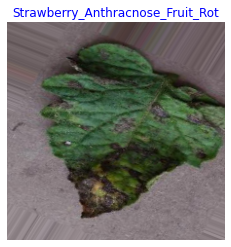

real label : Strawberry_Anthracnose_Fruit_Rot 6
predicted : Strawberry_Anthracnose_Fruit_Rot 3


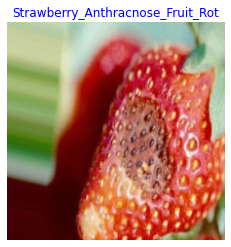

real label : Strawberry_Anthracnose_Fruit_Rot 3
predicted : Strawberry_Anthracnose_Fruit_Rot 3


In [96]:

image_batch, label_batch = train_ds.next()
predicted_batch = model.predict(train_ds)
predicted_ids = np.argmax(predicted_batch, axis=-1)
print(predicted_ids)
class_names = list(train_ds.class_indices.keys())
predicted_class_names = [class_names[id] for id in predicted_ids]
print(predicted_class_names)
import matplotlib.pyplot as plt
image_batch, label_batch =train_ds.next()

for n in range(9):
    plt.axis('off')
    plt.imshow(image_batch[n])
    #color = "blue" if predicted_ids[n] == tf.math.argmax(label_batch[n]) else "red"
    color = "blue" if predicted_class_names[np.argmax(label_batch[n])] ==predicted_class_names[np.argmax(predicted_batch[n])] else "red"
  #  plt.title(predicted_class_names[n], color=color)
    plt.title(predicted_class_names[n], color=color)
    plt.show()
    print('real label :',predicted_class_names[np.argmax(label_batch[n])],np.argmax(label_batch[n]))
    #    print('real label :',label_batch[n])

   # my_formatted_list = [ '%.3f' % elem for elem in predicted_batch[n] ]
   # print('predicted:', my_formatted_list)
    print('predicted :',predicted_class_names[np.argmax(predicted_batch[n])],np.argmax(predicted_batch[n]))

#print(predicted_batch[n])


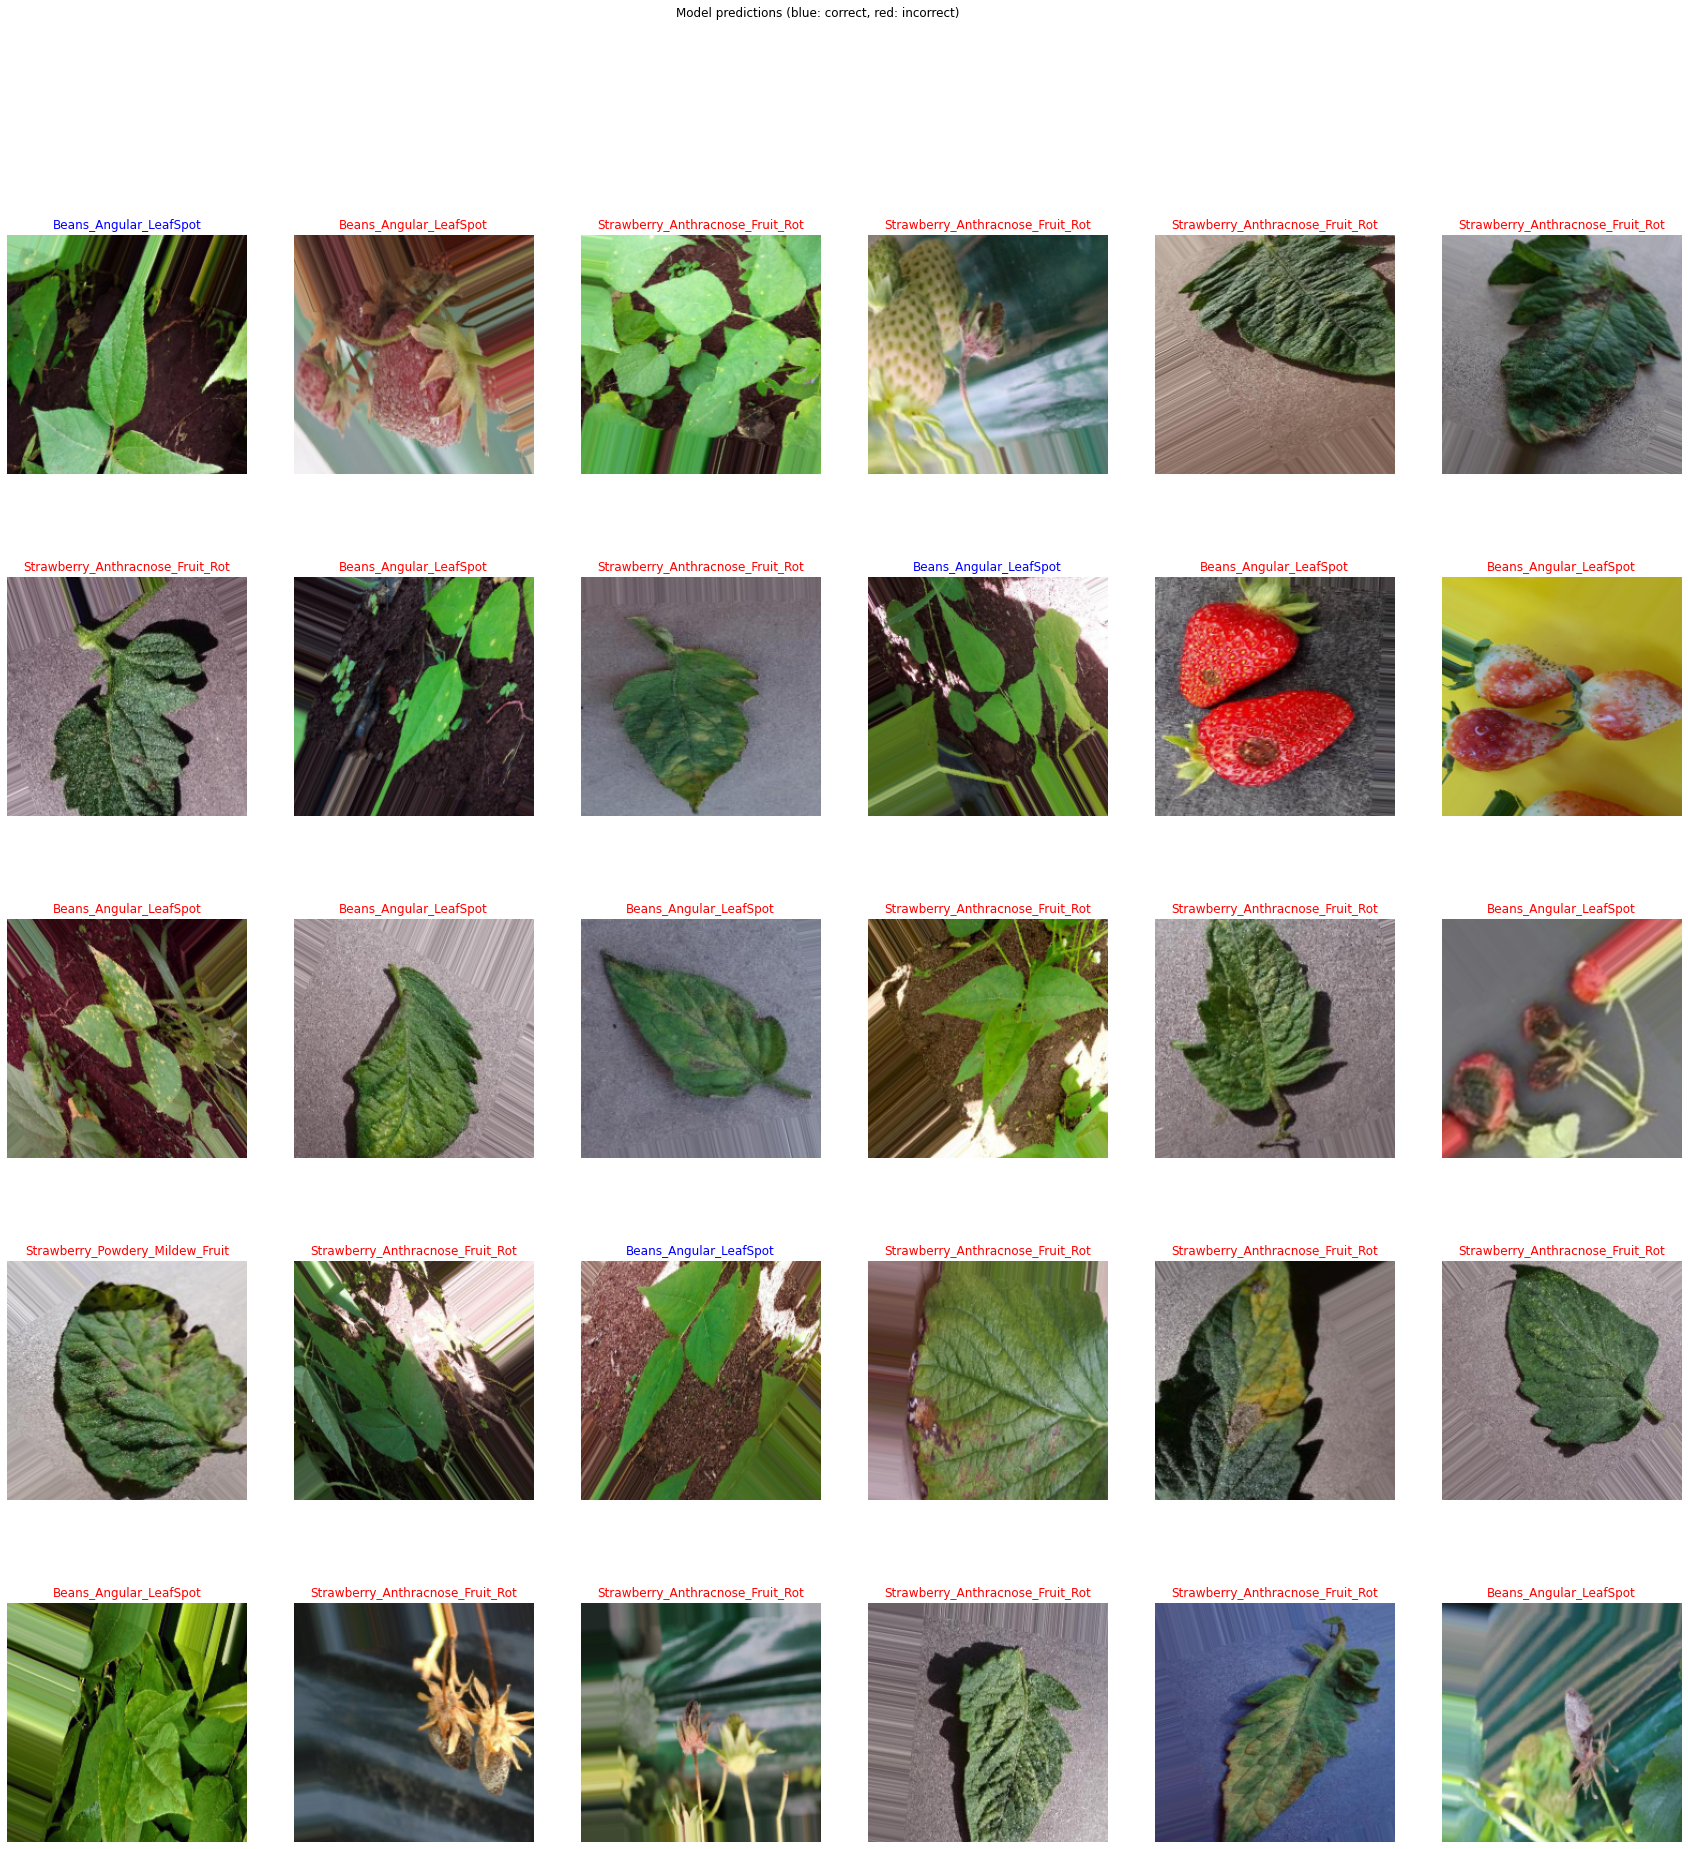

In [95]:


predicted_batch = model.predict(test_ds)
predicted_ids = np.argmax(predicted_batch, axis=-1)
class_names = list(train_ds.class_indices.keys())
predicted_class_names = [class_names[id] for id in predicted_ids]

import matplotlib.pyplot as plt
image_batch, label_batch = train_ds.next()

plt.figure(figsize=(30,30))
for n in range(30):
    plt.subplot(5,6,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(image_batch[n])
    color = "blue" if predicted_ids[n] == tf.math.argmax(label_batch[n]) else "red"
  #  plt.title(predicted_class_names[n], color=color)
    plt.title(predicted_class_names[n], color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")